# <u>Sat Bild reduzieren</u>
Um Bildanalyse auf Wasser zu konzentrieren, soll das Satellitbild mit Maske reduziert werden.

Landmassen werden auf allen Bildkanälen auf 0-Pixel geändert.

Beim Verkacheln können dann alle Kacheln mit nur 0-Pixel (Summe aller Pixel im Bild) verworfen werden.

## Shape der Meeresfläche
https://www.marineregions.org/gazetteer.php/gazetteer.php?p=details&id=3314

inhalt von .zip muss in src/resources/download_images

weitere Mittelmeer-Zonen können hier heruntergeladen werden:

https://www.marineregions.org/gazetteer.php/gazetteer.php?p=details&id=1905

Wieso Shape? Mit Shape ist es leichter eine beliebige Auflösung zu generieren, die zum Satellitenbild passen muss, ansonsten müsste für jede .TIFF eine mindestens gleich hoch aufgelöste landmassen.tiff gefunden werden.

## Satellitenbild
https://drive.google.com/drive/folders/1kG9z3OEjunzAXJSrurj0vVcg0LmkTsg7

## Erforderliche Komponenten einer Shapefile
| Erweiterung | Zweck                                                                 |
|-------------|----------------------------------------------------------------------|
| .shp        | Hauptgeometriedatei — enthält die Vektorformen (Punkte, Linien, Polygone). |
| .shx        | Shape-Indexdatei — ermöglicht Software, die Geometrie schnell zu lokalisieren. |
| .dbf        | Attributdaten — eine Tabelle mit Metadaten/Attributen (wie Namen, IDs, etc.), die den Formen zugeordnet sind. |
| .prj        | Projektionsdatei — enthält Informationen über das Koordinatenreferenzsystem (CRS). |

## TODO
- Die qualität der Shape könnte besser sein?
- Es muss anhand der Original-TIFF die passende(n) .shp dateien gefunden werden.

### Variablen

In [1]:
fp_shp = r'src/resources/download_images/iho.shp'
fp1 = r'src/resources/download_images/S2A_OPER_MSI_L2A_TL_2APS_20230130T142458_A039730_T33TWJ_N05.09.tif'
fp2 = fp1.replace(".tif", "_mask.tif")
fp3 = fp1.replace(".tif", "_SeaOnly.tif")

# Bedingt durch Ungenauikeit der Shapefile, 
# Verschiebung der Landmassen vom Wasser weg (Inland) um x Meter
LandmassenBuffer = 250

In [10]:
!python -m pip freeze > requirements_copy.txt

### Funktionen
Shape in Tiff umwandeln für kompatibilität mit Sat Bild.

Es wird nur der Abschnitt benutzt, der auch mit dem Zielbild übereinstimmt und dann in eine Maske umgewandelt.

In [ ]:
from landmask import shp_to_tif, mask_fp1_using_fp2

Code ausführen

In [ ]:
print("Converting shapefile to raster (fp2)...")
shp_to_tif(fp_shp, fp1, fp2, LandmassenBuffer)
print(f"Rasterized shapefile saved as: {fp2}")

print("Masking fp1 using fp2 to obtain sea-only image (fp3)...")
mask_fp1_using_fp2(fp1, fp2, fp3)
print(f"Sea-only image saved as: {fp3}")

## Validierung

### Check ob Maskierung geklappt hat

In [2]:
from landmask_validation import inspect_fp, plot_shp_and_raster_bounds

Band inspection

---------- Inspecting Shapefile ----------


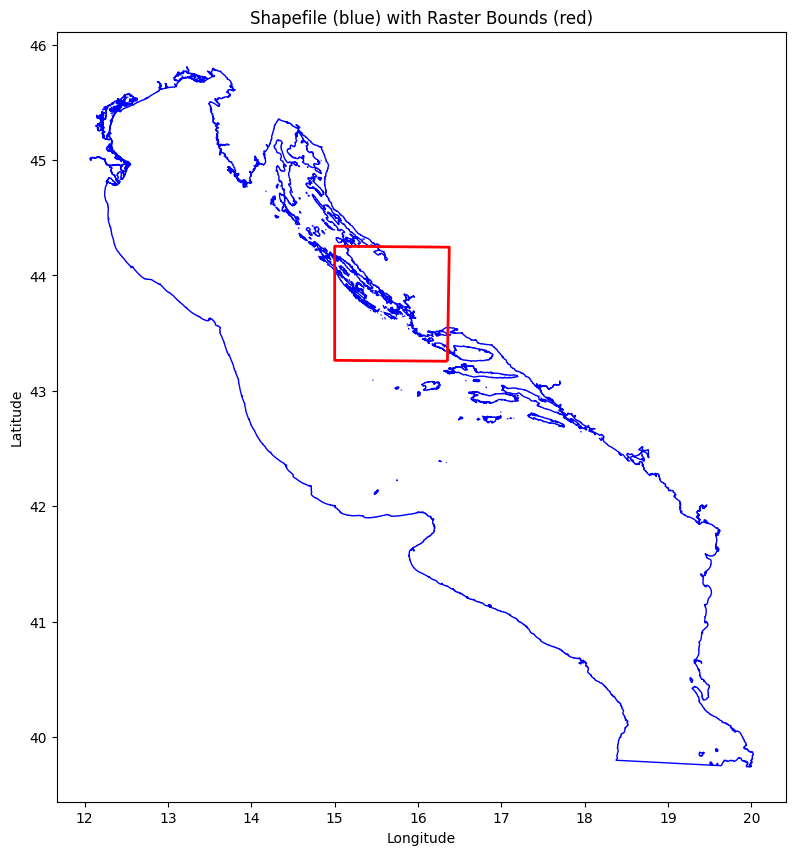

---------- Inspecting Mask ----------
Number of bands: 1
CRS: EPSG:32633
Bounds: BoundingBox(left=499980.0, bottom=4790213.333333333, right=609786.6666666666, top=4900020.0)
Transform: | 23.33, 0.00, 499980.00|
| 0.00,-23.33, 4900020.00|
| 0.00, 0.00, 1.00|
Data shape: (1, 4706, 4706)


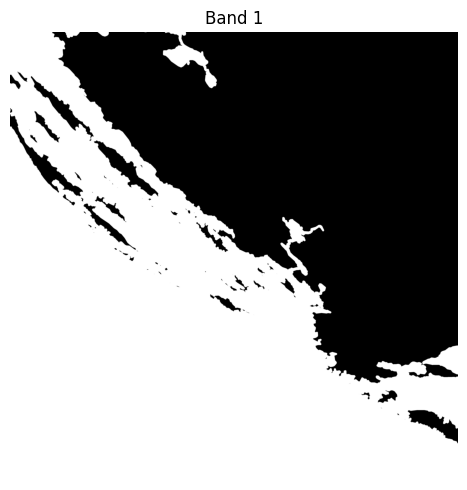

---------- Inspecting Original ----------
Number of bands: 12
CRS: EPSG:32633
Bounds: BoundingBox(left=499980.0, bottom=4790213.333333333, right=609786.6666666666, top=4900020.0)
Transform: | 23.33, 0.00, 499980.00|
| 0.00,-23.33, 4900020.00|
| 0.00, 0.00, 1.00|
Data shape: (12, 4706, 4706)


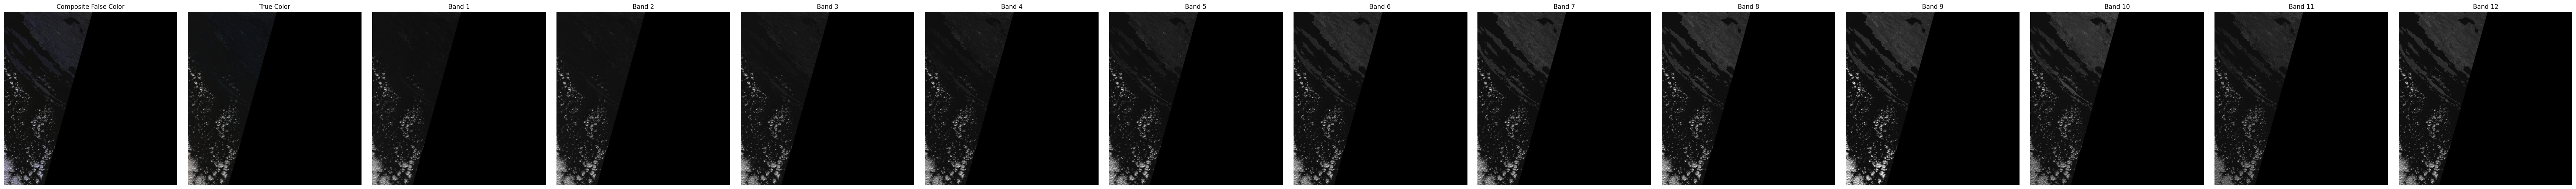

---------- Inspecting Sea Only ----------
Number of bands: 12
CRS: EPSG:32633
Bounds: BoundingBox(left=499980.0, bottom=4790213.333333333, right=609786.6666666666, top=4900020.0)
Transform: | 23.33, 0.00, 499980.00|
| 0.00,-23.33, 4900020.00|
| 0.00, 0.00, 1.00|
Data shape: (12, 4706, 4706)


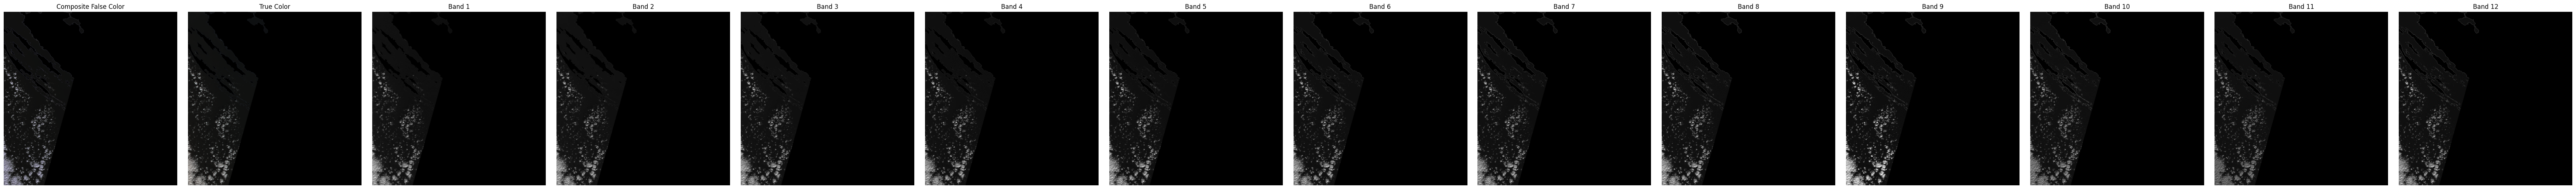

In [3]:
print("---------- Inspecting Shapefile ----------")
plot_shp_and_raster_bounds(fp_shp, fp1)
print("---------- Inspecting Mask ----------")
inspect_fp(fp2)
print("---------- Inspecting Original ----------")
inspect_fp(fp1)
print("---------- Inspecting Sea Only ----------")
inspect_fp(fp3)